### Key Objectives:
> #### Understand the individual variables in the data set
> #### Understand how the variables in this dataset relate to the sale price of the house

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('house_train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# variables were interested
numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

In [7]:
housing = housing[numerical_vars+categorical_vars]

In [8]:
housing.shape

(1460, 15)

#### SalePrice variable

In [9]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

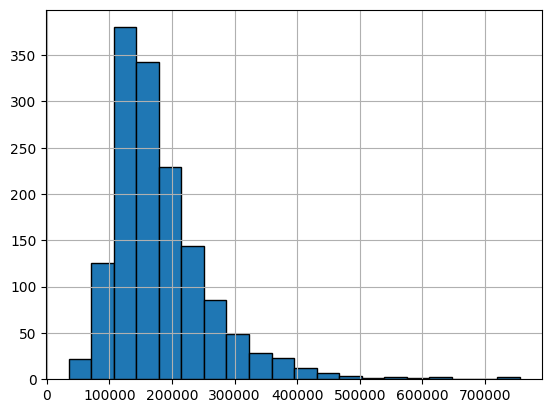

In [10]:
housing['SalePrice'].hist(bins=20, edgecolor='k');

In [11]:
print(f'skewness: {housing["SalePrice"].skew()}')
print(f'kurtosis: {housing["SalePrice"].kurt()}')

skewness: 1.8828757597682129
kurtosis: 6.536281860064529


* Very few houses are priced below 100,000.
* Most houses are concentrated between 100,000 and 200,000.
* Very few observations with very high prices.

#### Numerical

In [12]:
housing[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


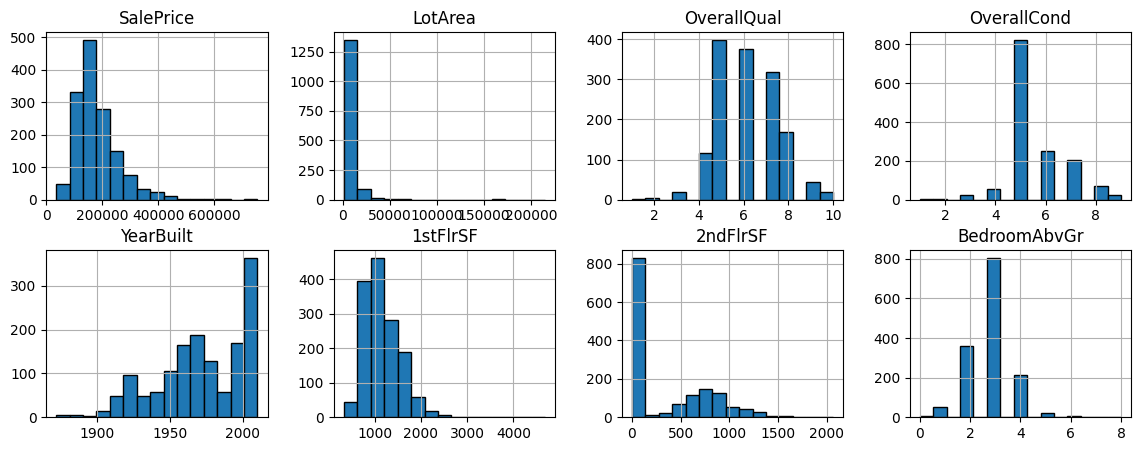

In [13]:
housing[numerical_vars].hist(edgecolor='k', bins=15, figsize=(14, 5), layout=(2, 4));

* LotArea is highly skewed. There are few houses with large amount of area.
* The Overall Conditions and Quality tend to be around 5. Few houses have very high or low ratings.
* YearBuilt will be used to create new variable (Age Variable).
* First Floor is skewed to the right. Very few big houses, but most of the houses have values around 1000 to 1200 square feet.
* Second Floor has a big bar around zero. Those are houses with no second floor.

In [14]:
housing['Age'] = housing['YrSold']-housing['YearBuilt'] # new variable Age

In [15]:
numerical_vars.remove('YearBuilt')
numerical_vars.append('Age')

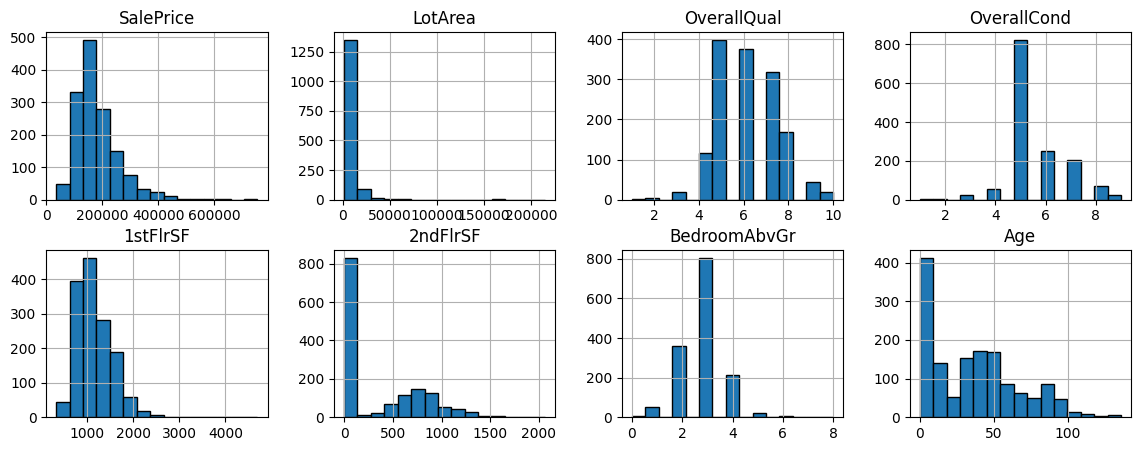

In [16]:
housing[numerical_vars].hist(edgecolor='k', bins=15, figsize=(14, 5), layout=(2, 4));

* Almost 400 houses were sold when they are new.

#### Categorical

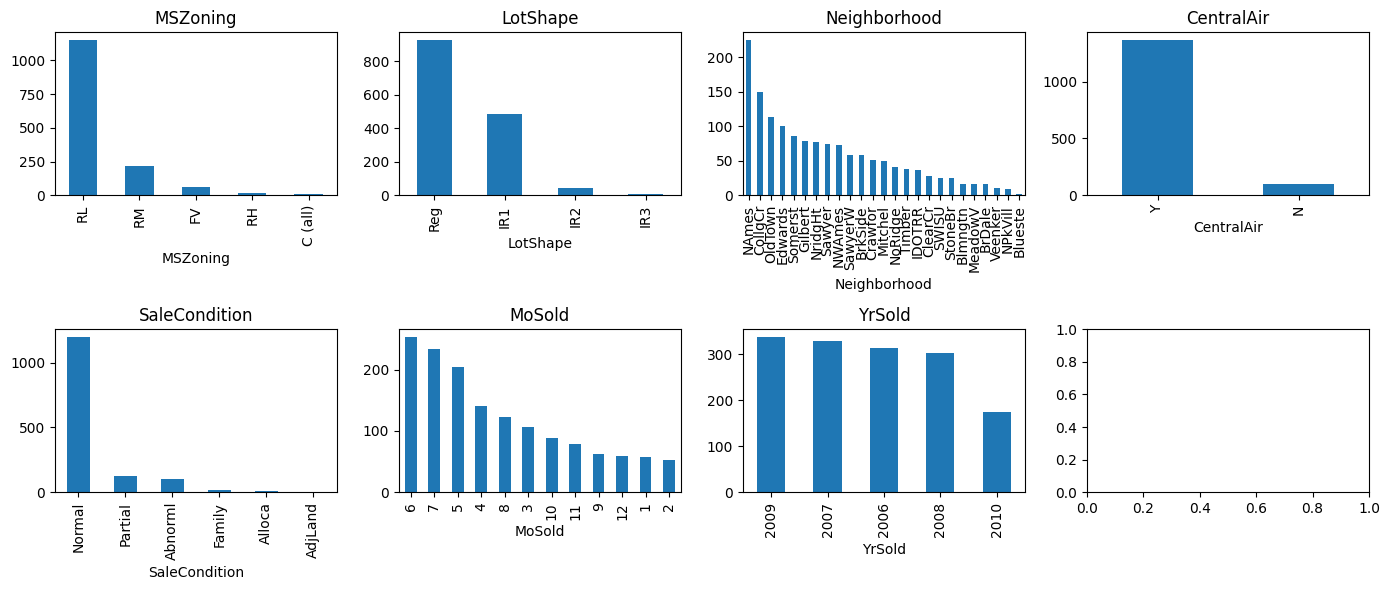

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
for var, subplot in zip(categorical_vars, axes.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout();

#### Removing the values that have fewer than 30 for each category

In [18]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [19]:
levels_to_keep = housing[categorical_vars].apply(identify_cat_above30)
levels_to_keep

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
MoSold                     [6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object

In [20]:
for var in categorical_vars:
    housing = housing.loc[housing[var].isin(levels_to_keep[var])]

In [21]:
housing.shape

(1246, 16)

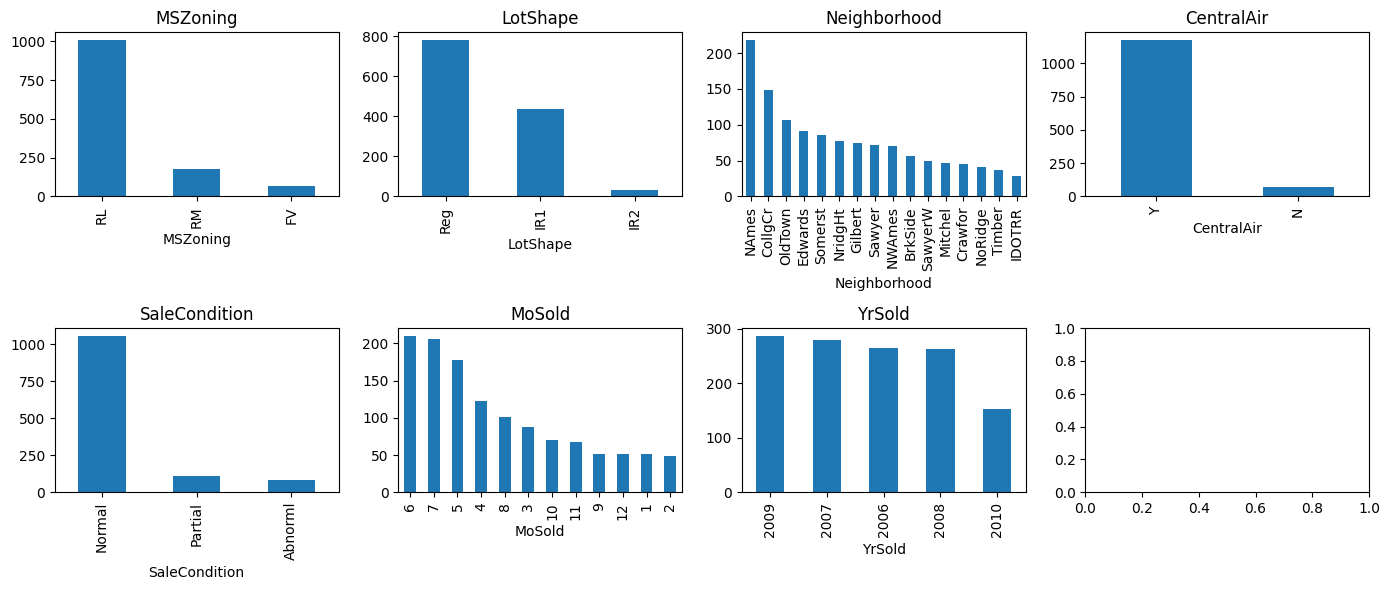

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
for var, subplot in zip(categorical_vars, axes.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout();

* Most homes are zoned as RL. (Resedential low density?)
* The majority of properties have a Regular lot shape.
* The neighborhood NAmes has the most properties. There is a noticeable drop-off in properties in neighborhoods.
* Almost all properties have central air conditioning.
* The majority of homes are sold under Normal conditions.
* The most common number of sales is 6, followed by 5, 4, and 8. A smaller number of homes were sold in other months.
* 2009 have the highest volume of sales.

### Relationships between numerical variables

In [23]:
housing.columns

Index(['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'MSZoning', 'LotShape',
       'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold',
       'Age'],
      dtype='object')

#### Scatter plots

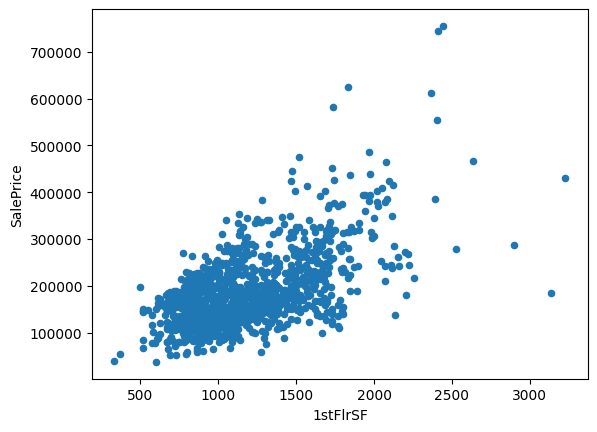

In [24]:
housing.plot.scatter(x='1stFlrSF', y='SalePrice');

* Theres a positive relationship. The more first floor you have the higher the likely the sale price of the house.

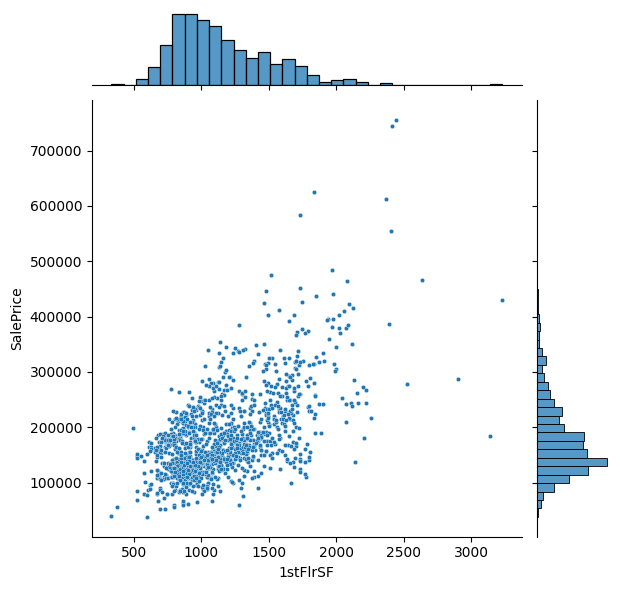

In [25]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=housing, joint_kws={"s": 10} ); # seaborn

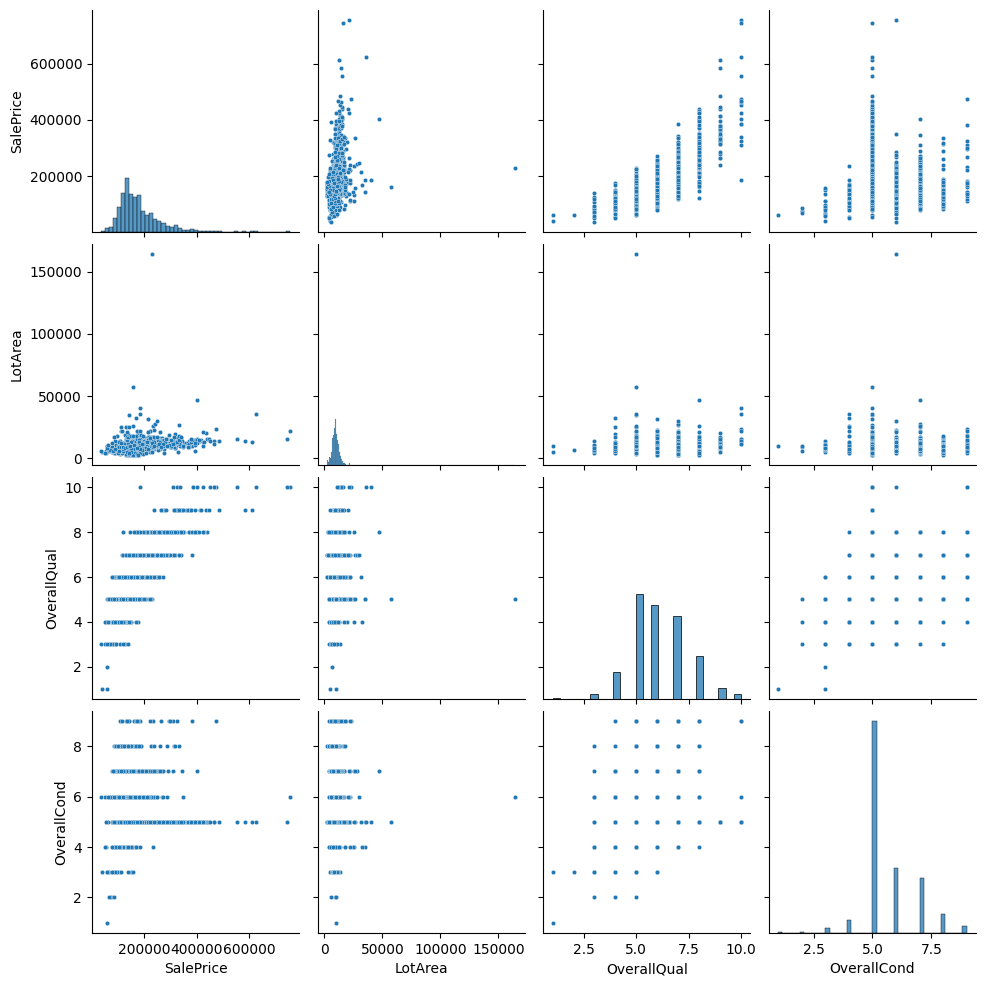

In [26]:
sns.pairplot(housing[numerical_vars[:4]], plot_kws={"s": 10}); # 4 numerical variables

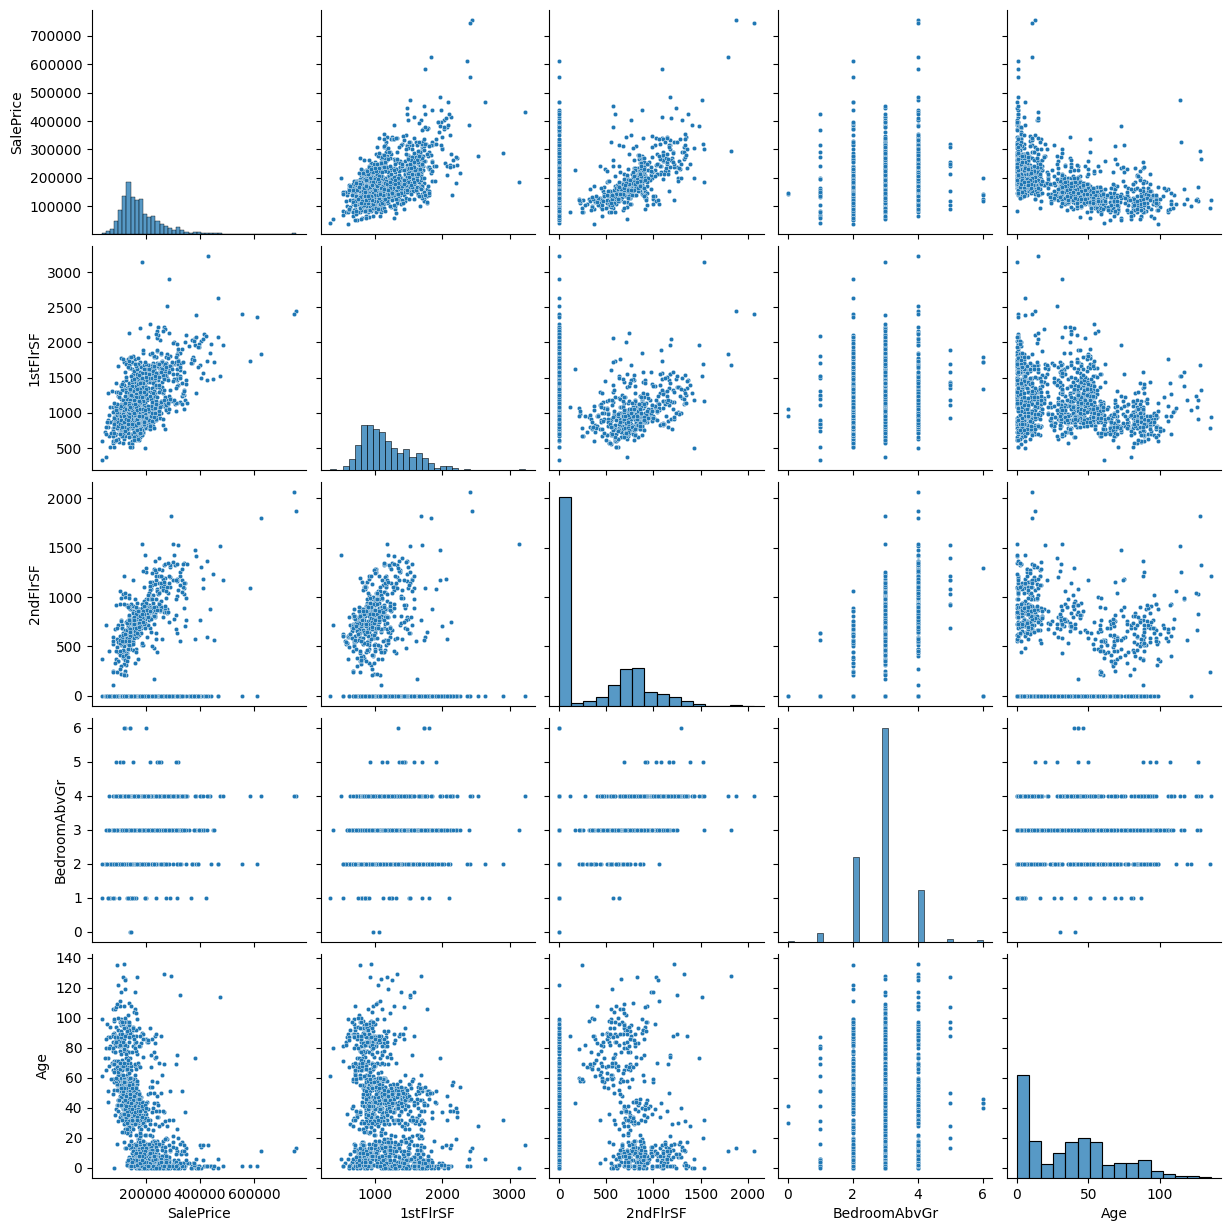

In [27]:
sns.pairplot(housing[['SalePrice']+numerical_vars[4:]], plot_kws={"s": 10}); # The rest of the numerical vars

#### Correlation matrices and heat map

In [28]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.264047,0.803188,-0.101111,0.611263,0.354388,0.218890,-0.530739
LotArea,0.264047,1.000000,0.119991,-0.021709,0.317519,0.071973,0.190736,-0.038842
OverallQual,0.803188,0.119991,1.000000,-0.109034,0.459432,0.345501,0.162826,-0.568832
OverallCond,-0.101111,-0.021709,-0.109034,1.000000,-0.155206,0.008419,-0.021736,0.420063
1stFlrSF,0.611263,0.317519,0.459432,-0.155206,1.000000,-0.213051,0.157983,-0.277169
2ndFlrSF,0.354388,0.071973,0.345501,0.008419,-0.213051,1.000000,0.486526,-0.050952
BedroomAbvGr,0.218890,0.190736,0.162826,-0.021736,0.157983,0.486526,1.000000,0.002496
Age,-0.530739,-0.038842,-0.568832,0.420063,-0.277169,-0.050952,0.002496,1.000000


In [29]:
housing[numerical_vars].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.803188
1stFlrSF        0.611263
2ndFlrSF        0.354388
LotArea         0.264047
BedroomAbvGr    0.218890
OverallCond    -0.101111
Age            -0.530739
Name: SalePrice, dtype: float64

In [30]:
correlations = housing[numerical_vars].corr()

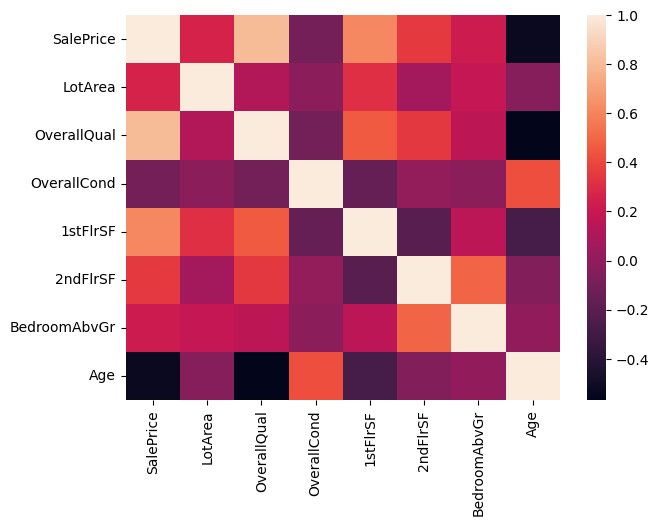

In [31]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(correlations, ax = ax);

### Relationship of SalePrice with categorical variables

In [32]:
housing[categorical_vars].columns

Index(['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition',
       'MoSold', 'YrSold'],
      dtype='object')

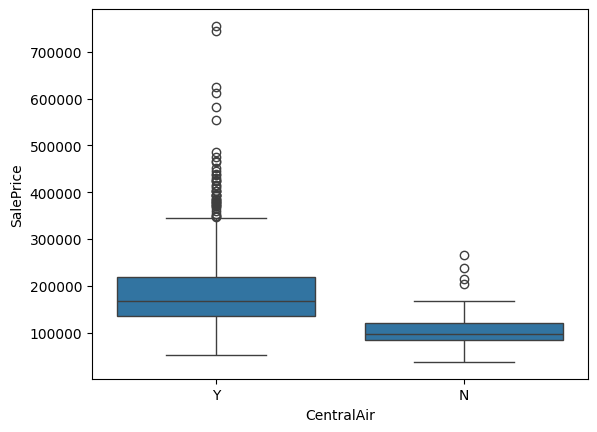

In [33]:
sns.boxplot(x='CentralAir', y='SalePrice', data=housing);

* for houses with no central air the prices are lower and the distribution is also lower.

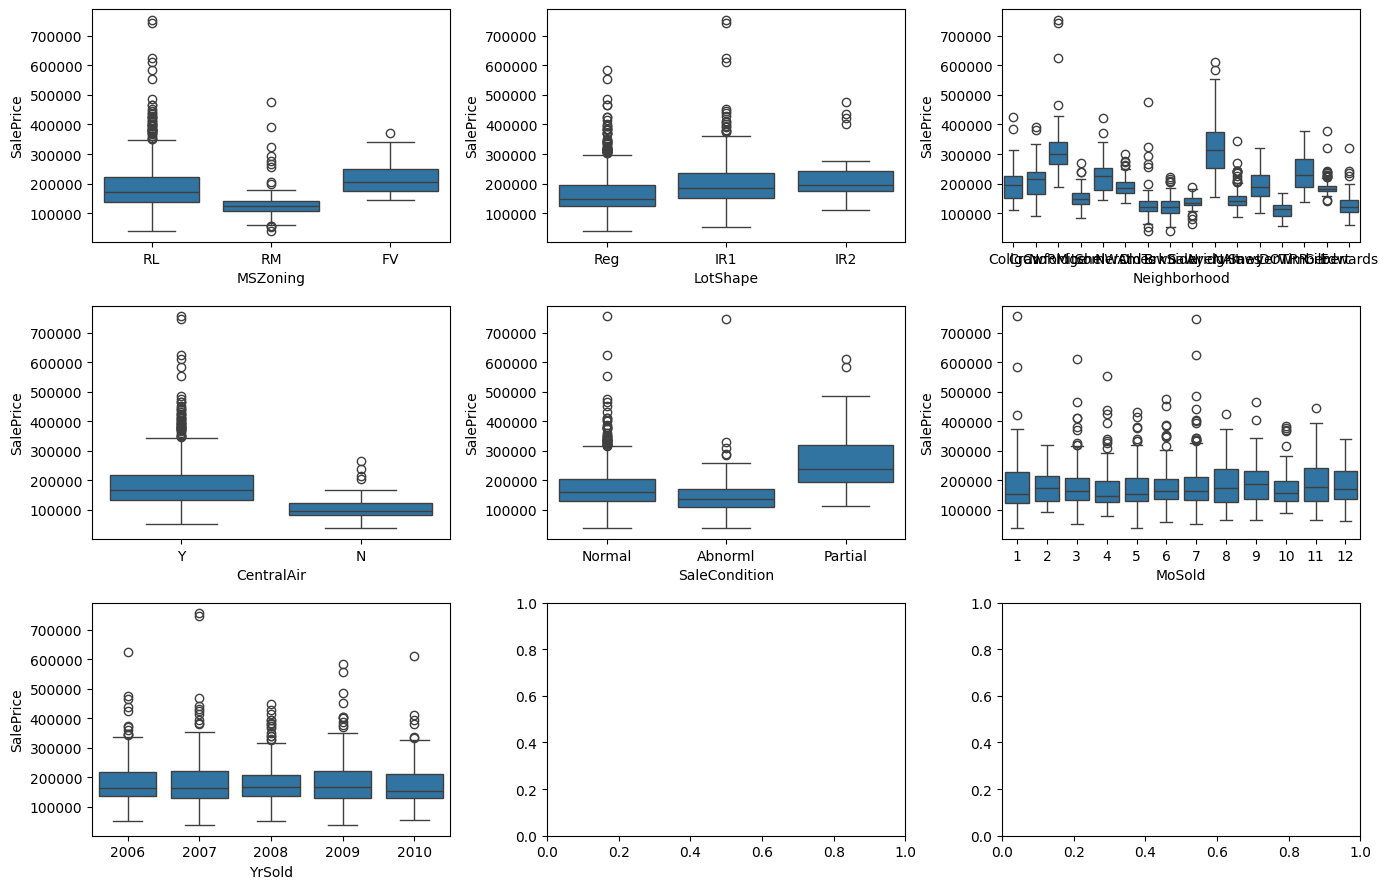

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(14, 9))
for var, subplot in zip(categorical_vars, axes.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax = subplot)

fig.tight_layout();

* in MsZoning the category RM definitely has a distribution with lower sale prices.
* in the Neighborhood there is definitely a different distribution for different neighborhoods.

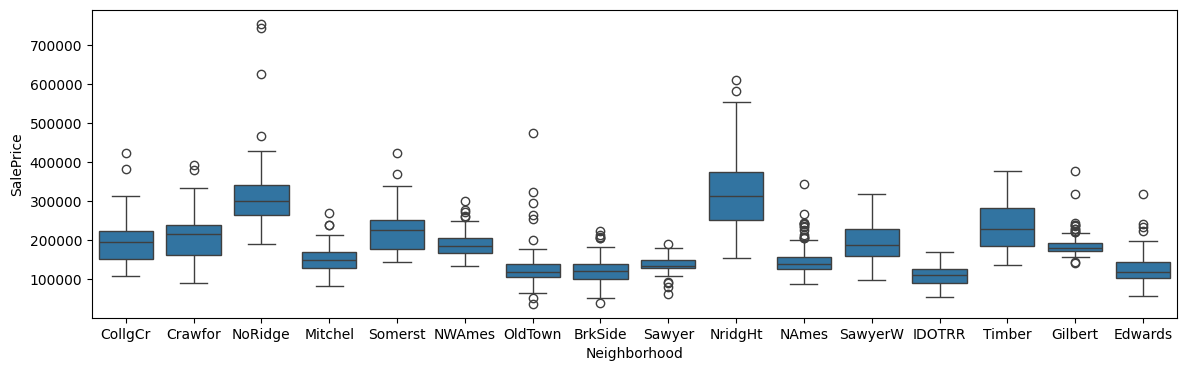

In [35]:
fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, ax= ax);

In [36]:
sorted_nb = housing.groupby('Neighborhood')['SalePrice'].median().sort_values().index.values
sorted_nb

array(['IDOTRR', 'OldTown', 'Edwards', 'BrkSide', 'Sawyer', 'NAmes',
       'Mitchel', 'Gilbert', 'NWAmes', 'SawyerW', 'CollgCr', 'Crawfor',
       'Somerst', 'Timber', 'NoRidge', 'NridgHt'], dtype=object)

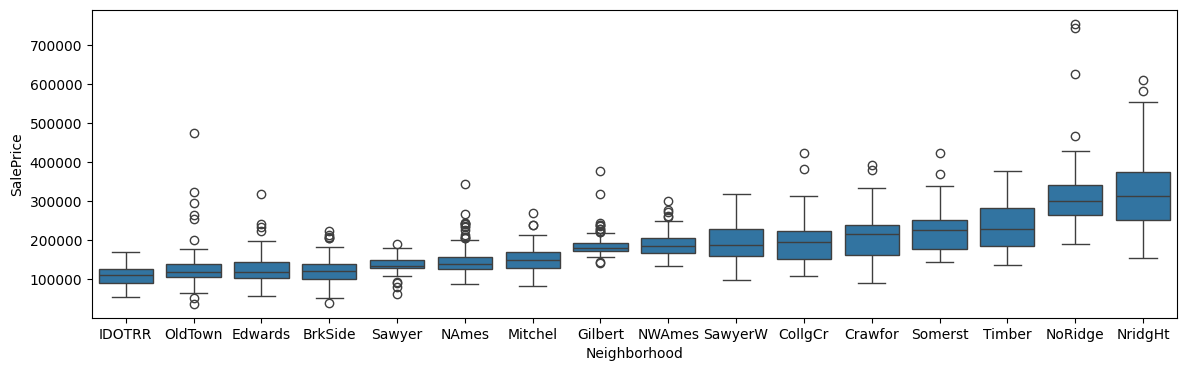

In [37]:
fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, ax= ax, order=sorted_nb);

* We can see the cheapest neighborhood where the median price is around 100,000 and the most expensive house is around 300,000.
* small boxes means that all the prices are close to each other and the large boxes means that we have a lot of despersion in the distribution of prices.

### Complex conditional plot

In [38]:
housing.columns

Index(['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'MSZoning', 'LotShape',
       'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold',
       'Age'],
      dtype='object')

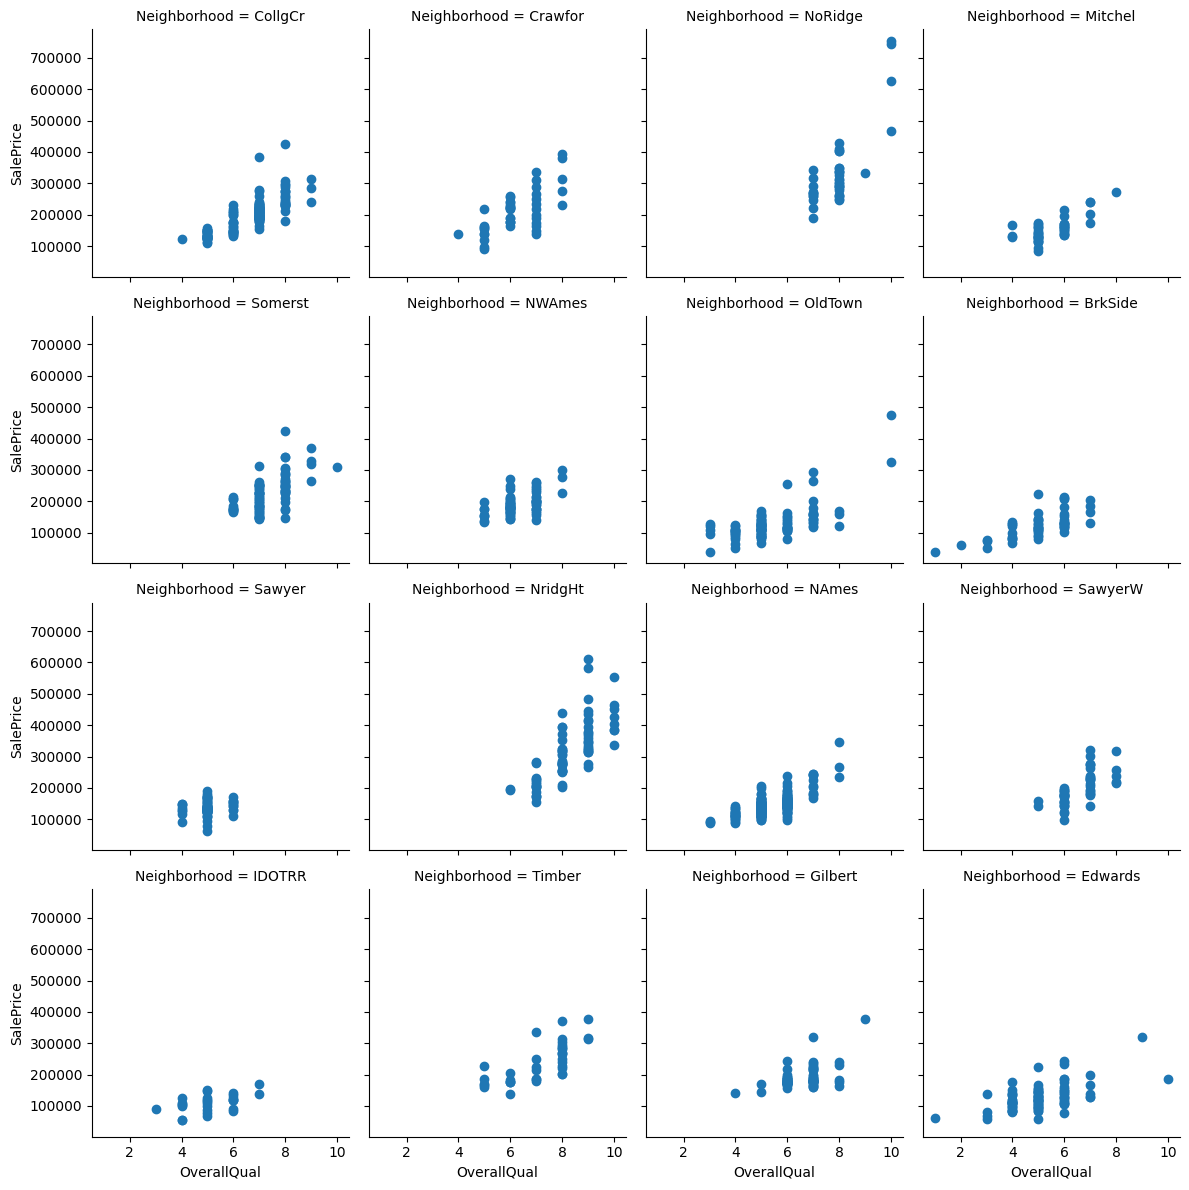

In [39]:
conditional_plot = sns.FacetGrid(housing, col='Neighborhood', col_wrap=4)
conditional_plot.map(plt.scatter, 'OverallQual', 'SalePrice');

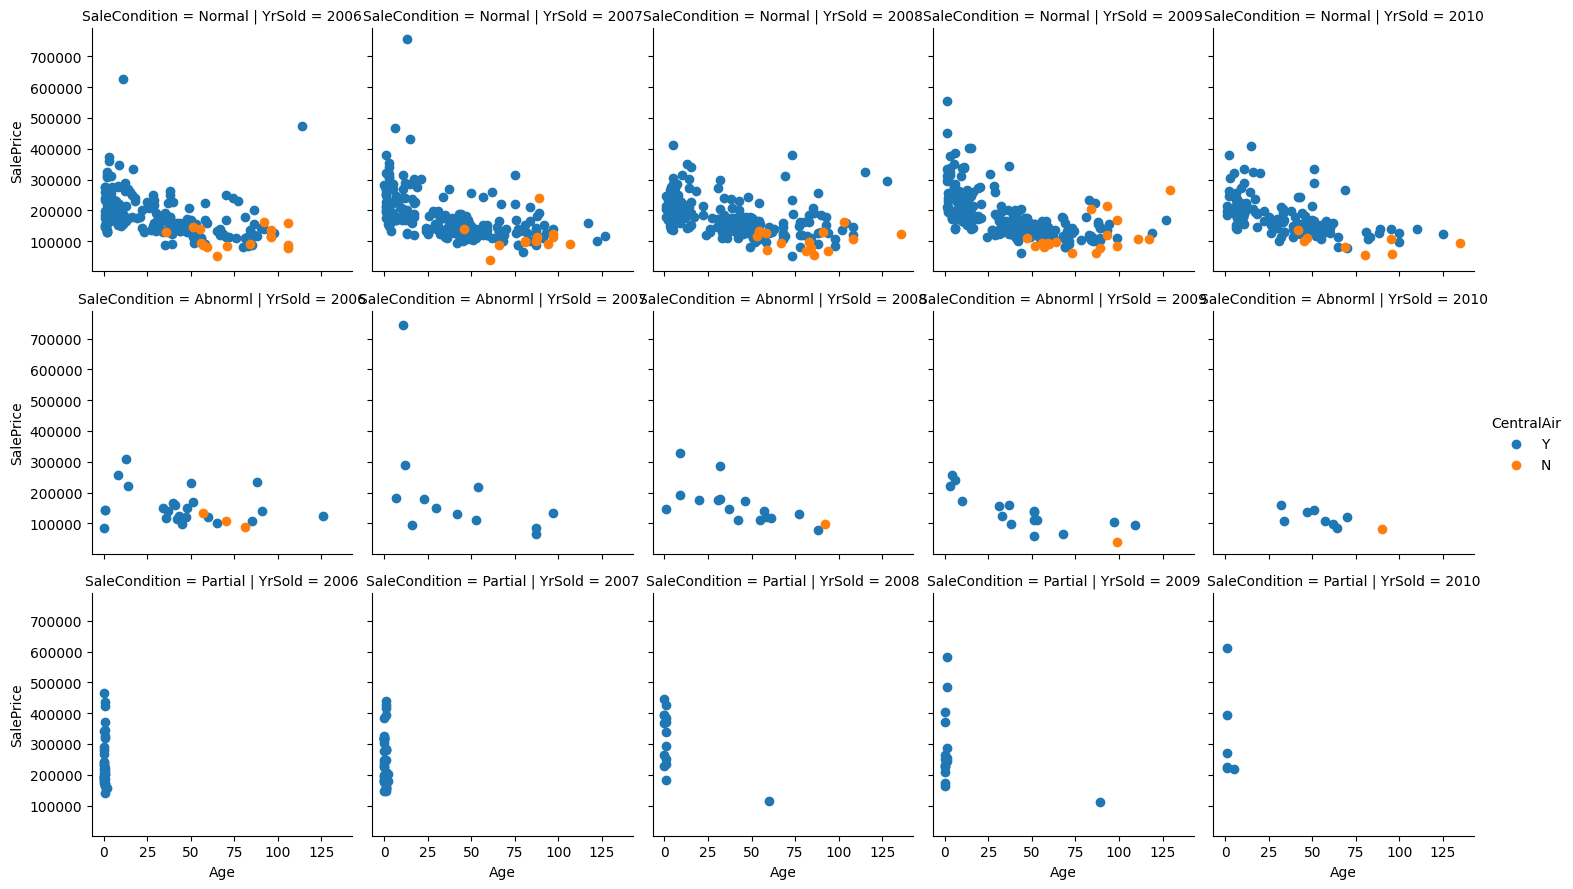

In [40]:
conditional_plot = sns.FacetGrid(housing, col='YrSold', row='SaleCondition', hue='CentralAir')
conditional_plot.map(plt.scatter, 'Age', 'SalePrice').add_legend();

In [41]:
categorical_vars

['MSZoning',
 'LotShape',
 'Neighborhood',
 'CentralAir',
 'SaleCondition',
 'MoSold',
 'YrSold']